**Introduction**

* This notebook serves as a demonstration to train and enhance my Python skills, particularly focusing on data analysis and visualization. The analysis presented here is based on customer segmentation and marketing strategy optimization using a dataset from a digital marketing campaign. The primary objectives of this analysis are to identify patterns in conversion rates across different customer segments. 

Therefore, I propose the following questions:

**Questions：**

1. Is there a significant difference in conversion rates among different marketing channels?

2. Is the conversion rate for the Email channel higher than that for the Social Media channel?

3. Is the PPC channel more effective in driving customer conversions compared to other channels?

4. How does the conversion rate of the Referral channel compare to other channels?

5. How do different marketing channels perform among different customer segments?

6. What are the conversion rate differences across age groups for different channels?

7. Do different genders respond differently to various marketing channels?

8. How do customers of different income levels engage and convert across different channels?

In [1]:
import pandas as pd

# Load the data
df = pd.read_csv('/kaggle/input/predict-conversion-in-digital-marketing-dataset/digital_marketing_campaign_dataset.csv')

# Preview the first five rows of the data
print("Preview of the data:")
print(df.head())

# Display the data types of each column
print("\nData types of each column:")
print(df.dtypes)

Preview of the data:
   CustomerID  Age  Gender  Income CampaignChannel CampaignType      AdSpend  \
0        8000   56  Female  136912    Social Media    Awareness  6497.870068   
1        8001   69    Male   41760           Email    Retention  3898.668606   
2        8002   46  Female   88456             PPC    Awareness  1546.429596   
3        8003   32  Female   44085             PPC   Conversion   539.525936   
4        8004   60  Female   83964             PPC   Conversion  1678.043573   

   ClickThroughRate  ConversionRate  WebsiteVisits  PagesPerVisit  TimeOnSite  \
0          0.043919        0.088031              0       2.399017    7.396803   
1          0.155725        0.182725             42       2.917138    5.352549   
2          0.277490        0.076423              2       8.223619   13.794901   
3          0.137611        0.088004             47       4.540939   14.688363   
4          0.252851        0.109940              0       2.046847   13.993370   

   SocialSh

In [2]:
import pandas as pd

missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 CustomerID             0
Age                    0
Gender                 0
Income                 0
CampaignChannel        0
CampaignType           0
AdSpend                0
ClickThroughRate       0
ConversionRate         0
WebsiteVisits          0
PagesPerVisit          0
TimeOnSite             0
SocialShares           0
EmailOpens             0
EmailClicks            0
PreviousPurchases      0
LoyaltyPoints          0
AdvertisingPlatform    0
AdvertisingTool        0
Conversion             0
dtype: int64


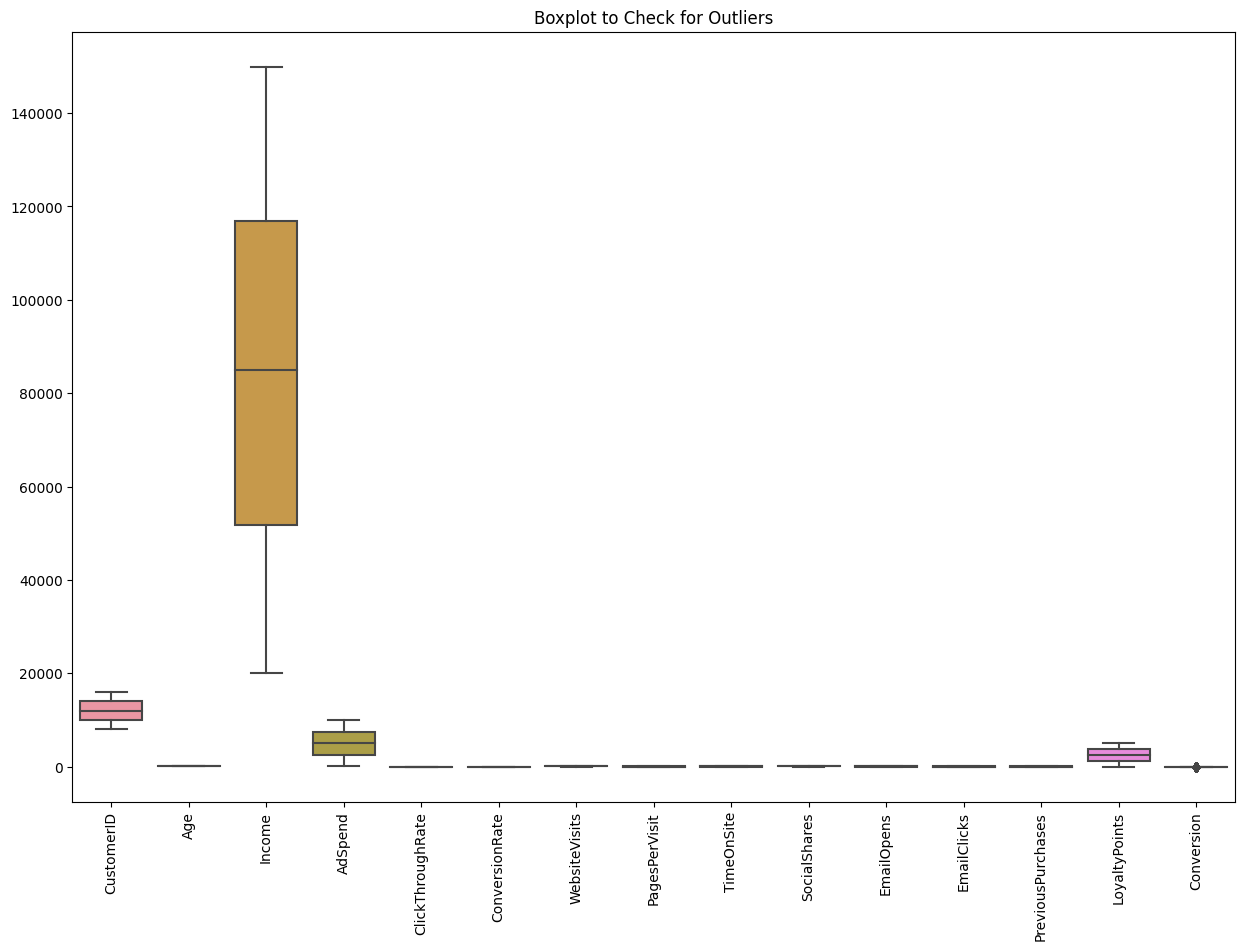

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Use boxplot to check for outliers
plt.figure(figsize=(15, 10))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.title('Boxplot to Check for Outliers')
plt.show()

In [4]:
# Define age groups
age_bins = [0, 18, 25, 35, 45, 55, 65, 75]
age_labels = ['<18', '18-25', '26-35', '36-45', '46-55', '56-65', '66-75']
df['AgeGroup'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

# Verify the new AgeGroup column
print("\nData with AgeGroup:")
print(df[['Age', 'AgeGroup']].head(10))

# Define income groups
income_bins = [0, 25000, 50000, 75000, 100000, 125000, 150000]
income_labels = ['<25k', '25k-50k', '50k-75k', '75k-100k', '100k-125k', '125k-150k']
df['IncomeGroup'] = pd.cut(df['Income'], bins=income_bins, labels=income_labels, right=False)

# Print the first few rows to verify the change
print("\nData with IncomeGroup:")
print(df[['Income', 'IncomeGroup']].head(10))


Data with AgeGroup:
   Age AgeGroup
0   56    56-65
1   69    66-75
2   46    46-55
3   32    26-35
4   60    56-65
5   25    26-35
6   38    36-45
7   56    56-65
8   36    36-45
9   40    36-45

Data with IncomeGroup:
   Income IncomeGroup
0  136912   125k-150k
1   41760     25k-50k
2   88456    75k-100k
3   44085     25k-50k
4   83964    75k-100k
5   42925     25k-50k
6   25615     25k-50k
7   57083     50k-75k
8  140788   125k-150k
9  130764   125k-150k


In [5]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# One-hot encode gender
onehot_encoder = OneHotEncoder(sparse_output=False)
gender_onehot = onehot_encoder.fit_transform(df[['Gender']])
gender_onehot_df = pd.DataFrame(gender_onehot, columns=onehot_encoder.get_feature_names_out(['Gender']))

# Add one-hot encoded columns back to the original dataframe
df = pd.concat([df, gender_onehot_df], axis=1)
print("\nData with one-hot encoded Gender columns:")
print(df.head())

# Label encode age group and income group
age_order = ['<18', '18-25', '26-35', '36-45', '46-55', '56-65', '66-75']
income_order = ['<25k', '25k-50k', '50k-75k', '75k-100k', '100k-125k', '125k-150k']

age_encoder = LabelEncoder()
income_encoder = LabelEncoder()

age_encoder.fit(age_order)
income_encoder.fit(income_order)

df['AgeGroup_LabelEncoded'] = age_encoder.transform(df['AgeGroup'])
df['IncomeGroup_LabelEncoded'] = income_encoder.transform(df['IncomeGroup'])

print("\nData after Label Encoding AgeGroup:")
print(df[['AgeGroup', 'AgeGroup_LabelEncoded']].head())

print("\nData after Label Encoding IncomeGroup:")
print(df[['IncomeGroup', 'IncomeGroup_LabelEncoded']].head())


Data with one-hot encoded Gender columns:
   CustomerID  Age  Gender  Income CampaignChannel CampaignType      AdSpend  \
0        8000   56  Female  136912    Social Media    Awareness  6497.870068   
1        8001   69    Male   41760           Email    Retention  3898.668606   
2        8002   46  Female   88456             PPC    Awareness  1546.429596   
3        8003   32  Female   44085             PPC   Conversion   539.525936   
4        8004   60  Female   83964             PPC   Conversion  1678.043573   

   ClickThroughRate  ConversionRate  WebsiteVisits  ...  EmailClicks  \
0          0.043919        0.088031              0  ...            9   
1          0.155725        0.182725             42  ...            7   
2          0.277490        0.076423              2  ...            2   
3          0.137611        0.088004             47  ...            2   
4          0.252851        0.109940              0  ...            6   

   PreviousPurchases  LoyaltyPoints  Advert


Overall Conversion Rates by Gender:
Gender
Female    0.876214
Male      0.876938
Name: Conversion, dtype: float64


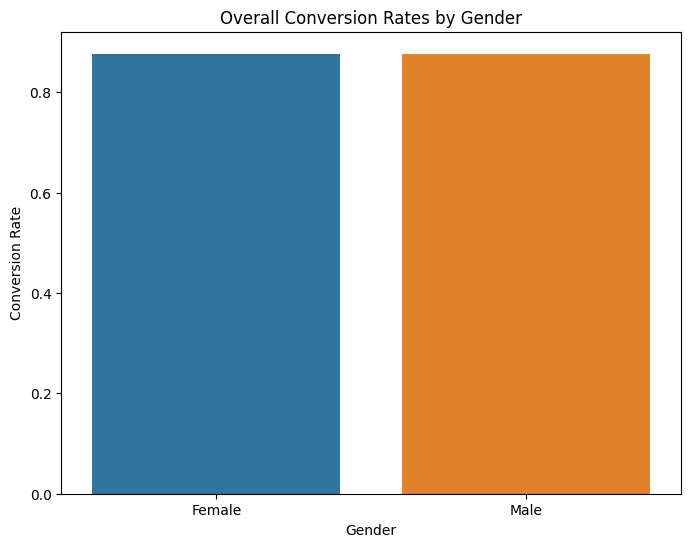

In [6]:
# Overall conversion rates by gender
gender_conversion = df.groupby('Gender')['Conversion'].mean()
print("\nOverall Conversion Rates by Gender:")
print(gender_conversion)

# Visualize overall conversion rates by gender
plt.figure(figsize=(8, 6))
sns.barplot(x=gender_conversion.index, y=gender_conversion.values)
plt.title('Overall Conversion Rates by Gender')
plt.xlabel('Gender')
plt.ylabel('Conversion Rate')
plt.show()


Male - Conversion rates by Income Group and Age Group:
IncomeGroup  AgeGroup
<25k         18-25       0.809524
             26-35       0.818182
             36-45       0.923077
             46-55       0.700000
             56-65       0.888889
             66-75       0.833333
25k-50k      18-25       0.876404
             26-35       0.875912
             36-45       0.933884
             46-55       0.884058
             56-65       0.853448
             66-75       0.875000
50k-75k      18-25       0.883117
             26-35       0.896226
             36-45       0.922414
             46-55       0.806202
             56-65       0.944954
             66-75       0.800000
75k-100k     18-25       0.863636
             26-35       0.904000
             36-45       0.899083
             46-55       0.884615
             56-65       0.840336
             66-75       0.892857
100k-125k    18-25       0.807229
             26-35       0.869919
             36-45       0.896552
    

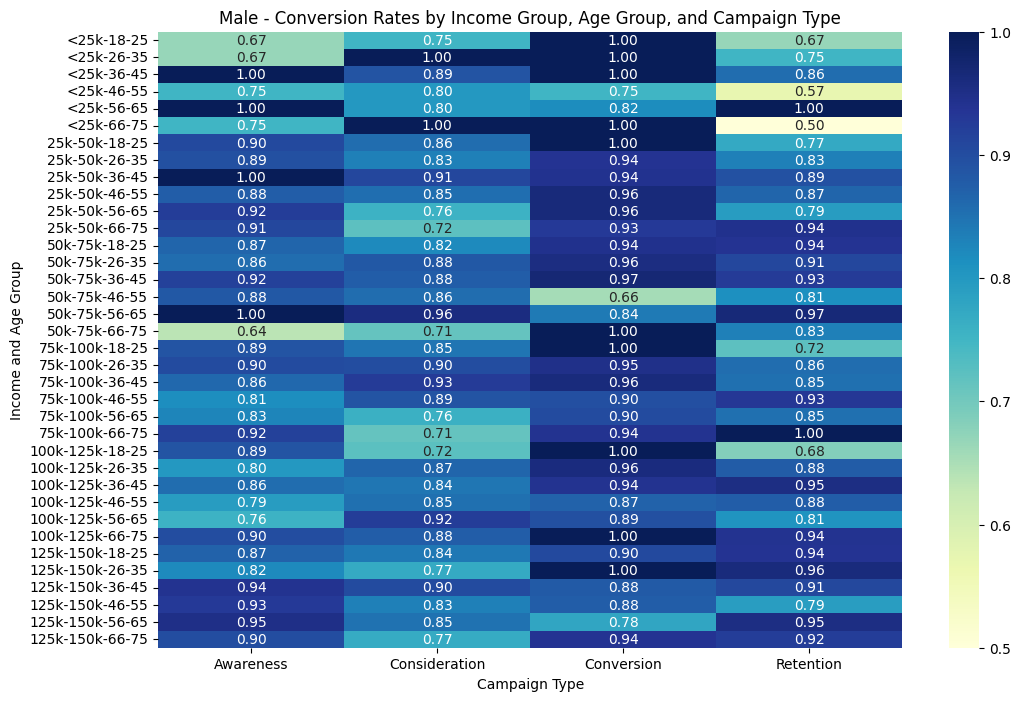

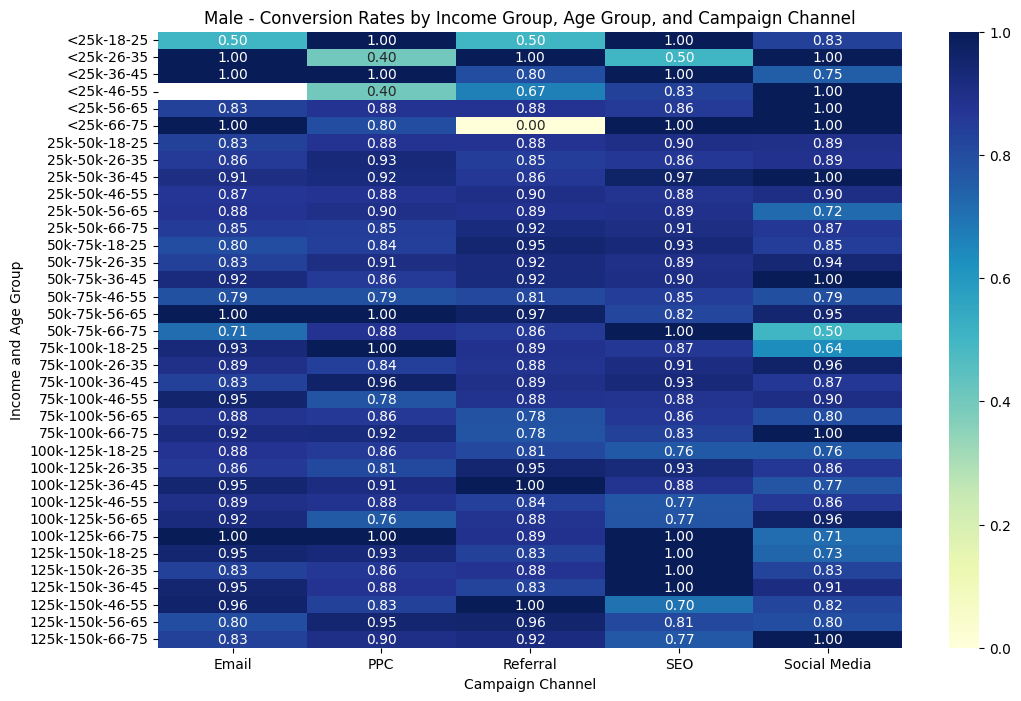

In [7]:
# Analyze conversion rates for male group
df_male = df[df['Gender'] == 'Male']
male_income_age_conversion = df_male.groupby(['IncomeGroup', 'AgeGroup'], observed=True)['Conversion'].mean()
print("\nMale - Conversion rates by Income Group and Age Group:")
print(male_income_age_conversion)

male_campaign_conversion = df_male.groupby(['IncomeGroup', 'AgeGroup', 'CampaignType'], observed=True)['Conversion'].mean().unstack()
male_channel_conversion = df_male.groupby(['IncomeGroup', 'AgeGroup', 'CampaignChannel'], observed=True)['Conversion'].mean().unstack()

# Visualize conversion rates for male group
def plot_heatmap(data, title, xlabel, ylabel):
    plt.figure(figsize=(12, 8))
    sns.heatmap(data, annot=True, fmt=".2f", cmap="YlGnBu")
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

# Visualize conversion rates by campaign type
plot_heatmap(male_campaign_conversion, 'Male - Conversion Rates by Income Group, Age Group, and Campaign Type', 'Campaign Type', 'Income and Age Group')

# Visualize conversion rates by campaign channel
plot_heatmap(male_channel_conversion, 'Male - Conversion Rates by Income Group, Age Group, and Campaign Channel', 'Campaign Channel', 'Income and Age Group')


Male - Conversion rates by Income Group and Age Group:
IncomeGroup  AgeGroup
<25k         18-25       0.809524
             26-35       0.818182
             36-45       0.923077
             46-55       0.700000
             56-65       0.888889
             66-75       0.833333
25k-50k      18-25       0.876404
             26-35       0.875912
             36-45       0.933884
             46-55       0.884058
             56-65       0.853448
             66-75       0.875000
50k-75k      18-25       0.883117
             26-35       0.896226
             36-45       0.922414
             46-55       0.806202
             56-65       0.944954
             66-75       0.800000
75k-100k     18-25       0.863636
             26-35       0.904000
             36-45       0.899083
             46-55       0.884615
             56-65       0.840336
             66-75       0.892857
100k-125k    18-25       0.807229
             26-35       0.869919
             36-45       0.896552
    

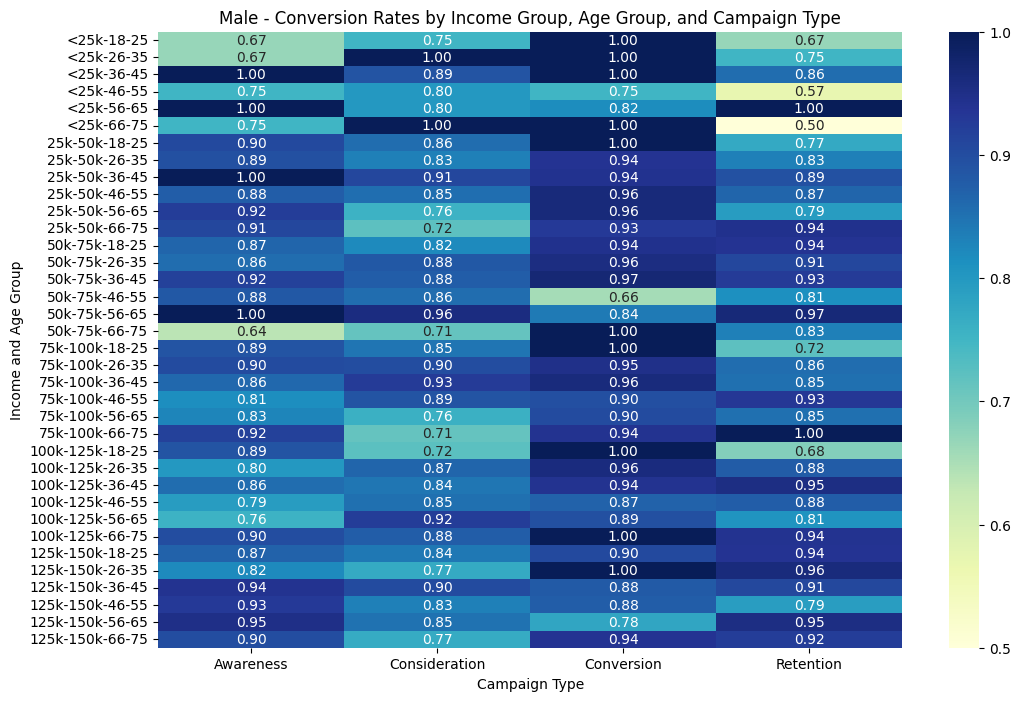

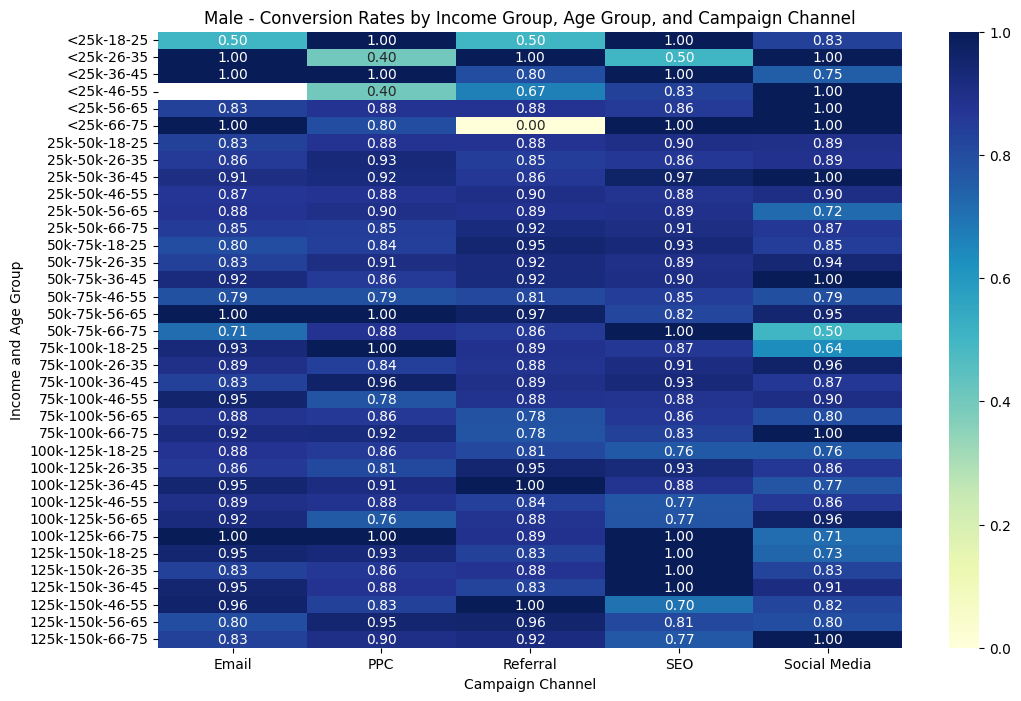

In [8]:
# Analyze conversion rates for male group
df_male = df[df['Gender'] == 'Male']
male_income_age_conversion = df_male.groupby(['IncomeGroup', 'AgeGroup'], observed=True)['Conversion'].mean()
print("\nMale - Conversion rates by Income Group and Age Group:")
print(male_income_age_conversion)

male_campaign_conversion = df_male.groupby(['IncomeGroup', 'AgeGroup', 'CampaignType'], observed=True)['Conversion'].mean().unstack()
male_channel_conversion = df_male.groupby(['IncomeGroup', 'AgeGroup', 'CampaignChannel'], observed=True)['Conversion'].mean().unstack()

# Visualize conversion rates for male group
def plot_heatmap(data, title, xlabel, ylabel):
    plt.figure(figsize=(12, 8))
    sns.heatmap(data, annot=True, fmt=".2f", cmap="YlGnBu")
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

# Visualize conversion rates by campaign type
plot_heatmap(male_campaign_conversion, 'Male - Conversion Rates by Income Group, Age Group, and Campaign Type', 'Campaign Type', 'Income and Age Group')

# Visualize conversion rates by campaign channel
plot_heatmap(male_channel_conversion, 'Male - Conversion Rates by Income Group, Age Group, and Campaign Channel', 'Campaign Channel', 'Income and Age Group')


Conversion rates by Gender and CampaignChannel:
CampaignChannel     Email       PPC  Referral       SEO  Social Media
Gender                                                               
Female           0.860879  0.888000  0.883080  0.876059      0.871477
Male             0.885191  0.874809  0.883058  0.877888      0.863924

Conversion rates by Gender and CampaignType:
CampaignType  Awareness  Consideration  Conversion  Retention
Gender                                                       
Female         0.843364       0.863714    0.941725   0.850644
Male           0.874839       0.843980    0.920253   0.869565


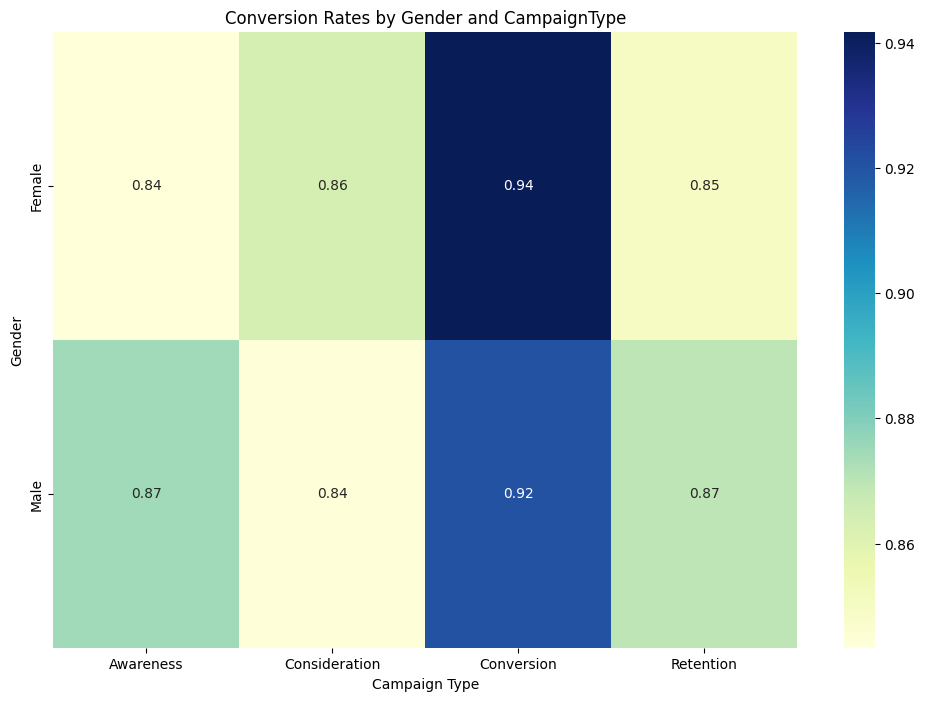

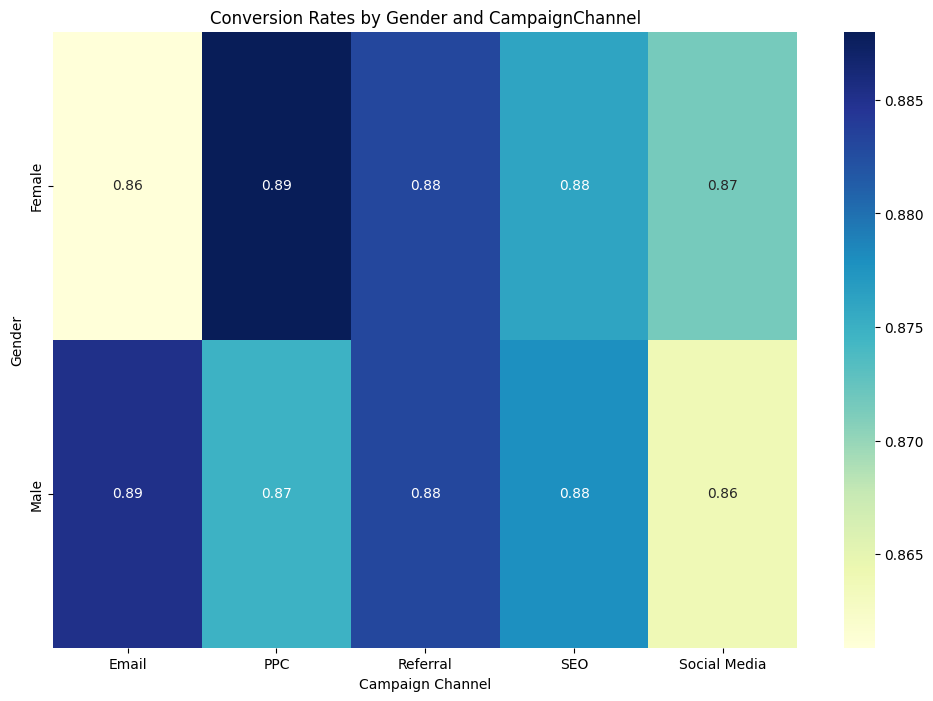

In [9]:
# Calculate conversion rates by Gender and CampaignChannel
gender_channel_conversion_rates = df.groupby(['Gender', 'CampaignChannel'])['Conversion'].mean().unstack()
print("\nConversion rates by Gender and CampaignChannel:")
print(gender_channel_conversion_rates)

# Calculate conversion rates by Gender and CampaignType
gender_campaign_conversion_rates = df.groupby(['Gender', 'CampaignType'])['Conversion'].mean().unstack()
print("\nConversion rates by Gender and CampaignType:")
print(gender_campaign_conversion_rates)

# Visualize conversion rates by Gender and CampaignType
plt.figure(figsize=(12, 8))
sns.heatmap(gender_campaign_conversion_rates, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title('Conversion Rates by Gender and CampaignType')
plt.xlabel('Campaign Type')
plt.ylabel('Gender')
plt.show()

# Visualize conversion rates by Gender and CampaignChannel
plt.figure(figsize=(12, 8))
sns.heatmap(gender_channel_conversion_rates, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title('Conversion Rates by Gender and CampaignChannel')
plt.xlabel('Campaign Channel')
plt.ylabel('Gender')
plt.show()


Conversion rates by AgeGroup and CampaignChannel:
CampaignChannel     Email       PPC  Referral       SEO  Social Media
AgeGroup                                                             
18-25            0.850962  0.886256  0.859729  0.895833      0.814070
26-35            0.864198  0.855385  0.868902  0.888489      0.894161
36-45            0.887789  0.902736  0.911315  0.893891      0.882540
46-55            0.861290  0.870432  0.890909  0.855738      0.875000
56-65            0.891892  0.897059  0.886297  0.869841      0.859712
66-75            0.856209  0.885906  0.864706  0.852349      0.864662

Conversion rates by AgeGroup and CampaignType:
CampaignType  Awareness  Consideration  Conversion  Retention
AgeGroup                                                     
18-25          0.850187       0.815603    0.934866   0.846154
26-35          0.833333       0.857550    0.947917   0.855263
36-45          0.882353       0.884422    0.945498   0.866310
46-55          0.858639       0

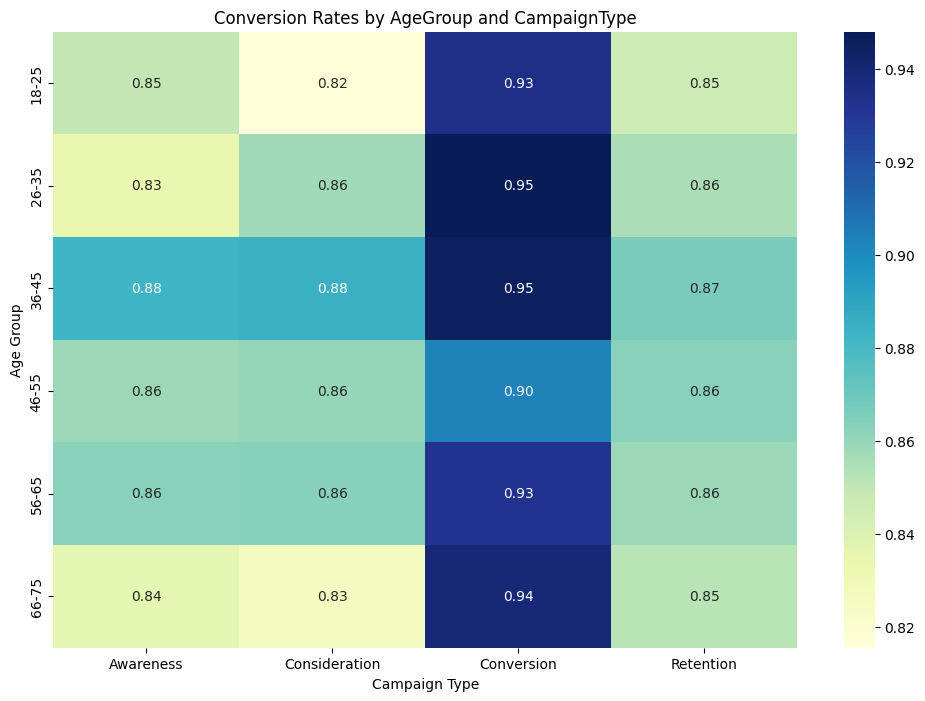

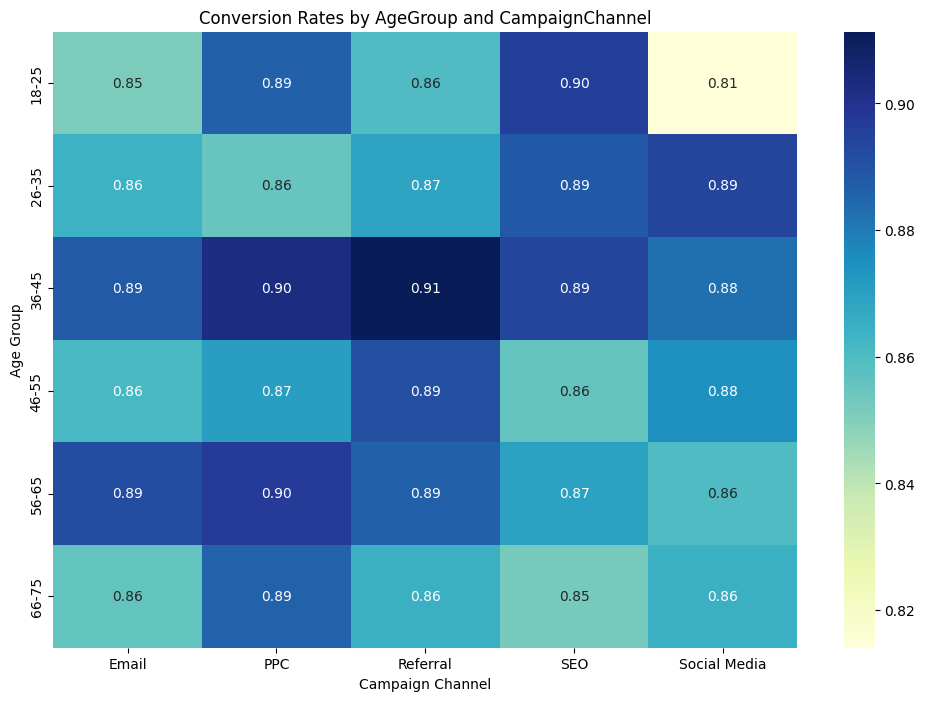

In [10]:
# Calculate conversion rates by AgeGroup and CampaignChannel
age_channel_conversion_rates = df.groupby(['AgeGroup', 'CampaignChannel'], observed=True)['Conversion'].mean().unstack()
print("\nConversion rates by AgeGroup and CampaignChannel:")
print(age_channel_conversion_rates)

# Calculate conversion rates by AgeGroup and CampaignType
age_campaign_conversion_rates = df.groupby(['AgeGroup', 'CampaignType'], observed=True)['Conversion'].mean().unstack()
print("\nConversion rates by AgeGroup and CampaignType:")
print(age_campaign_conversion_rates)

# Visualize conversion rates by AgeGroup and CampaignType
plt.figure(figsize=(12, 8))
sns.heatmap(age_campaign_conversion_rates, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title('Conversion Rates by AgeGroup and CampaignType')
plt.xlabel('Campaign Type')
plt.ylabel('Age Group')
plt.show()

# Visualize conversion rates by AgeGroup and CampaignChannel
plt.figure(figsize=(12, 8))
sns.heatmap(age_channel_conversion_rates, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title('Conversion Rates by AgeGroup and CampaignChannel')
plt.xlabel('Campaign Channel')
plt.ylabel('Age Group')
plt.show()


Conversion rates by IncomeGroup and CampaignChannel:
CampaignChannel     Email       PPC  Referral       SEO  Social Media
IncomeGroup                                                          
<25k             0.761194  0.850746  0.846154  0.877193      0.875000
25k-50k          0.857143  0.902597  0.871720  0.890966      0.859712
50k-75k          0.872910  0.875000  0.888545  0.885993      0.857639
75k-100k         0.876712  0.883117  0.859701  0.885305      0.889680
100k-125k        0.877483  0.877193  0.918841  0.852090      0.857143
125k-150k        0.894545  0.882857  0.883117  0.869091      0.876667

Conversion rates by IncomeGroup and CampaignType:
CampaignType  Awareness  Consideration  Conversion  Retention
IncomeGroup                                                  
<25k           0.845070       0.807229    0.951807   0.759036
25k-50k        0.878788       0.832911    0.948529   0.841823
50k-75k        0.852368       0.869898    0.909326   0.872222
75k-100k       0.844560  

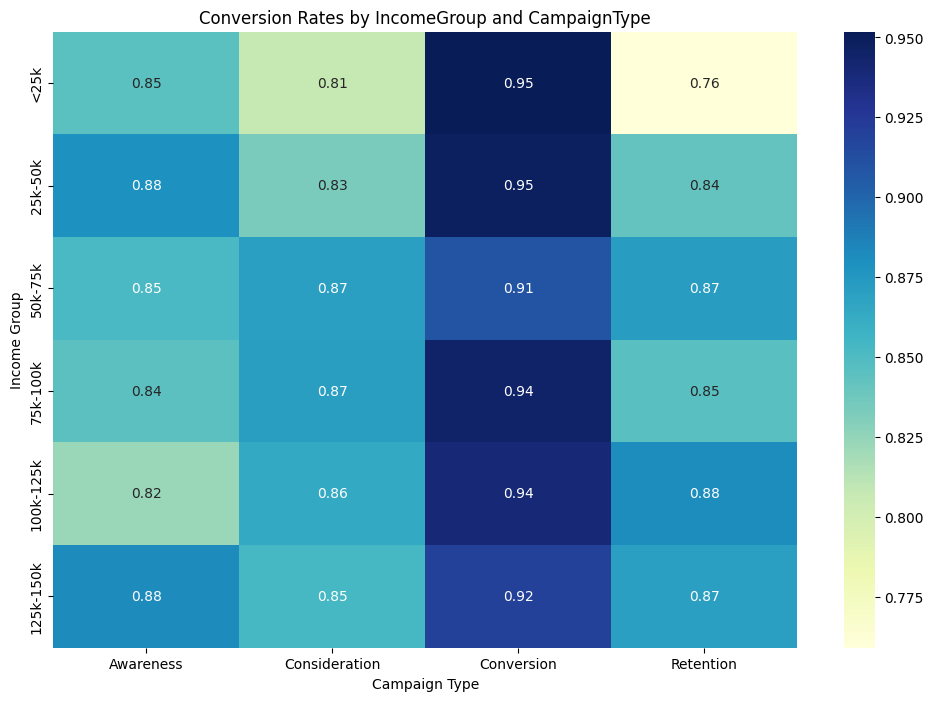

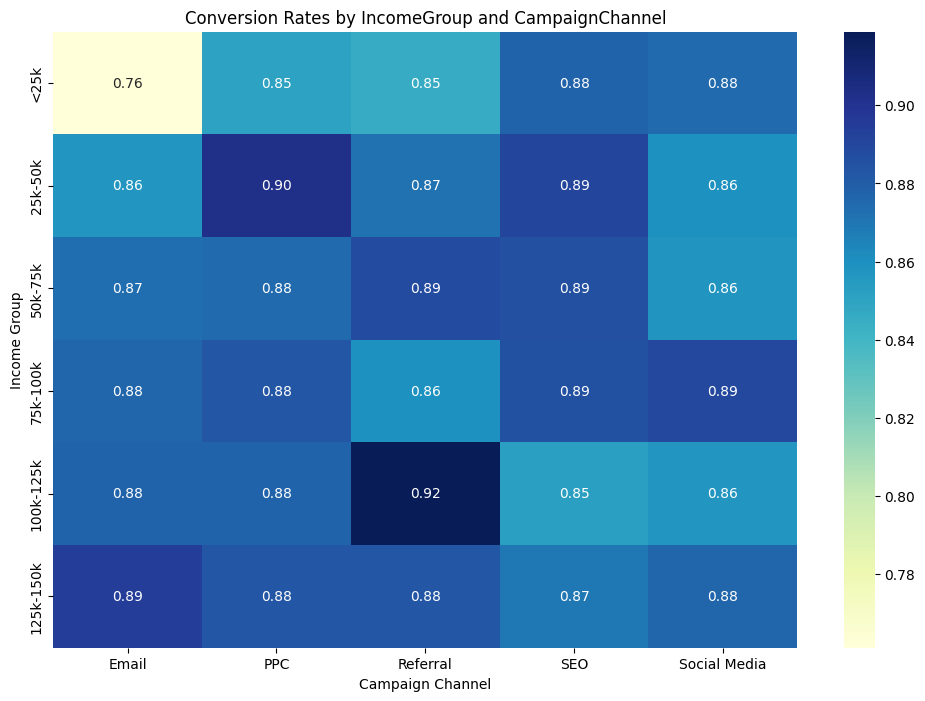

In [11]:
# Calculate conversion rates by IncomeGroup and CampaignChannel
income_channel_conversion_rates = df.groupby(['IncomeGroup', 'CampaignChannel'], observed=True)['Conversion'].mean().unstack()
print("\nConversion rates by IncomeGroup and CampaignChannel:")
print(income_channel_conversion_rates)

# Calculate conversion rates by IncomeGroup and CampaignType
income_campaign_conversion_rates = df.groupby(['IncomeGroup', 'CampaignType'], observed=True)['Conversion'].mean().unstack()
print("\nConversion rates by IncomeGroup and CampaignType:")
print(income_campaign_conversion_rates)

# Visualize conversion rates by IncomeGroup and CampaignType
plt.figure(figsize=(12, 8))
sns.heatmap(income_campaign_conversion_rates, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title('Conversion Rates by IncomeGroup and CampaignType')
plt.xlabel('Campaign Type')
plt.ylabel('Income Group')
plt.show()

# Visualize conversion rates by IncomeGroup and CampaignChannel
plt.figure(figsize=(12, 8))
sns.heatmap(income_channel_conversion_rates, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title('Conversion Rates by IncomeGroup and CampaignChannel')
plt.xlabel('Campaign Channel')
plt.ylabel('Income Group')
plt.show()

**Summary:**

**Male Group:**

**Highest Conversion Rates:**
* Typically appear in higher income segments.
* Perform best in the **Referral** and **Email** channels.

**Lowest Conversion Rates:**
* Usually found in lower income segments.
* Perform poorly in the **PPC** and **SEO** channels.

**Female Group:**

**Highest Conversion Rates:**
Typically appear in higher income segments.
Perform best in the **Retention** activity type and the **SEO** and **Email** channels.

**Lowest Conversion Rates:**
Usually found in lower income segments.
Perform poorly in the **Consideration** activity type and the **SEO** and **PPC** channels.

**Recommendations:**
For all groups, focus on high-income segments. Use **referral** and **email marketing** for men, and **retention activities** and **SEO** for women.

**Personalized Emails:** Send emails that include the customer's name, recommend products based on their interests, and offer discounts.

**Exclusive Benefits for High-Income Female Customers:** Provide unique benefits such as early access to new products, dedicated customer service, and additional discounts to enhance their loyalty.